## xcube server Compute API

This notebook demonstrates the usage of the experimental Compute API `/compute` of xcube server.

In [1]:
import requests
from IPython.display import JSON

Make sure xcube server is running. You can run it from here by uncommenting and executing the following cell:

In [2]:
# !xcube serve --config ../../serve/demo/config.yml

Server URL. Adjust, if you want a different server instance.

In [3]:
server_url = "http://localhost:8080"

Define helper functions for the server's HTTP methods for better readability:

In [4]:
def GET(path: str): 
    return JSON(requests.get(server_url + path).json())

def PUT(path: str, request: dict): 
    return JSON(requests.put(server_url + path, json=request).json())

Verify xcube server is accessible:

In [5]:
GET("/")

<IPython.core.display.JSON object>

First get available datasets:

In [6]:
GET("/datasets")

<IPython.core.display.JSON object>

Then get available dataset operations:

Get available operations:

In [7]:
GET("/compute/operations")

<IPython.core.display.JSON object>

Get more info about `spatial_subset`:

In [8]:
GET("/compute/operations/spatial_subset")

<IPython.core.display.JSON object>

Execute `spatial_subset`:

In [9]:
PUT("/compute/jobs", request={
    "operationId": "spatial_subset",
    "parameters": {
        "dataset": "local",
        "bbox": [1, 51, 4, 52]        
    },
    "output": {
        "datasetId": "local_subset",
        "title": "My local subset"
    }
})

<IPython.core.display.JSON object>

Get all the jobs submitted so far:

In [10]:
GET("/compute/jobs")

<IPython.core.display.JSON object>

Get specific job:

In [11]:
GET("/compute/jobs/0")

<IPython.core.display.JSON object>

Verify new dataset is exposed by the server

In [12]:
GET("/datasets")

<IPython.core.display.JSON object>

Access the new dataset using xcube server's S3 API:

In [13]:
from xcube.core.store import new_data_store

In [14]:
store = new_data_store(
   "s3",
   root="datasets", 
   storage_options=dict(
       anon=True, 
       client_kwargs=dict(
           endpoint_url=server_url + "/s3/"
       )
   )
)

In [15]:
store.list_data_ids()

['cog_local.zarr',
 'geotiff_local.zarr',
 'local.zarr',
 'local_1w.zarr',
 'local_subset.zarr',
 'local_ts.zarr']

In [16]:
local_subset = store.open_data("local_subset.zarr")

In [17]:
#local_subset

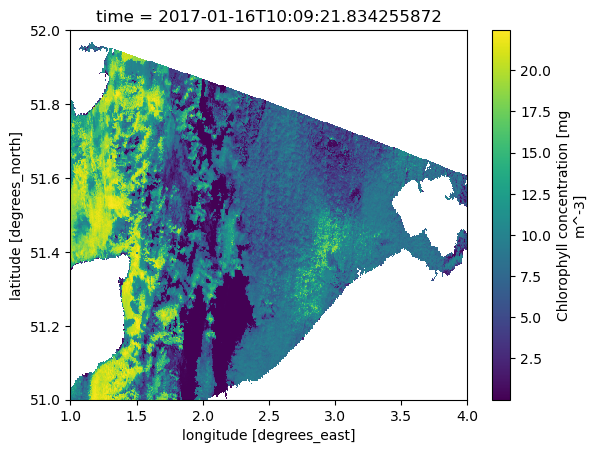

In [18]:
local_subset.conc_chl.isel(time=0).plot.imshow()